# Overview
## Goal
- Analyze current performance:
    - Identify best performing ads groups based on available data.
    - Explore metrics that reflect ads performance.
    - Grouping ads based on a specified metric.




- Predict future performance
    - Within each group, predict the number of ads shown on a specific day.


## 1. Data Exploration and Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in data
data = pd.read_csv("Data/ad_table.csv")
print(data.shape)
data.head()

(2115, 7)


,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [3]:
#there are no missing values in the dataset
data.isnull().mean()

date                  0.0
shown                 0.0
clicked               0.0
converted             0.0
avg_cost_per_click    0.0
total_revenue         0.0
ad                    0.0
dtype: float64

In [4]:
#there are 40 ad groups
len(data["ad"].value_counts())

40

In [5]:
#shorten names of ad group
group_num = [x.split("_")[-1] for x in data["ad"]]

In [6]:
data.loc[:,"group"] = group_num 

In [7]:
data.tail()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,group
2110,2015-11-18,78111,1326,37,1.01,553.36,ad_group_40,40
2111,2015-11-19,79857,1413,34,1.00,840.72,ad_group_40,40
2112,2015-11-20,75695,1332,35,1.09,468.95,ad_group_40,40
2113,2015-11-21,73761,1336,36,1.11,437.03,ad_group_40,40
2114,2015-11-22,77907,1391,34,0.99,409.30,ad_group_40,40


## 2. EDA
- Explore summary distributions of different metrics across ad groups.
- Explore change in metrics over time.


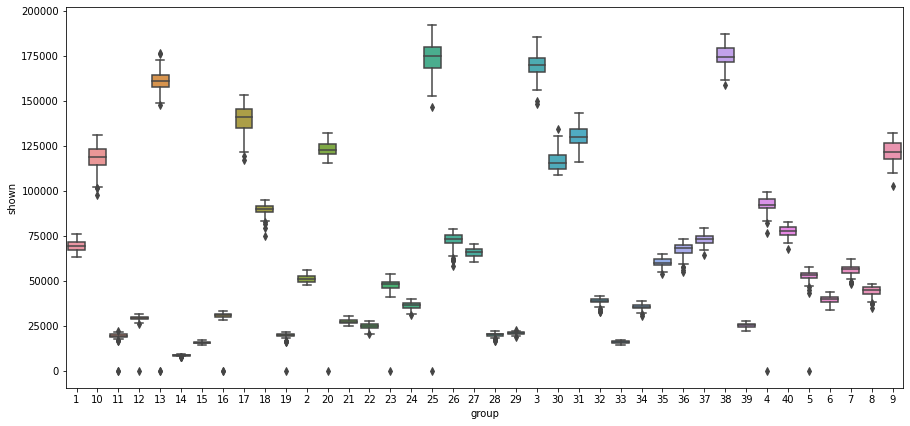

In [8]:
#Distribution of number of ads shown across groups
plt.figure(figsize=(15,7))
ax = sns.boxplot("group","shown",data=data)

The number of ads shown differs significantly among groups. There are four groups with a median higher than 150000, thery are group 3,13,25 and 38.

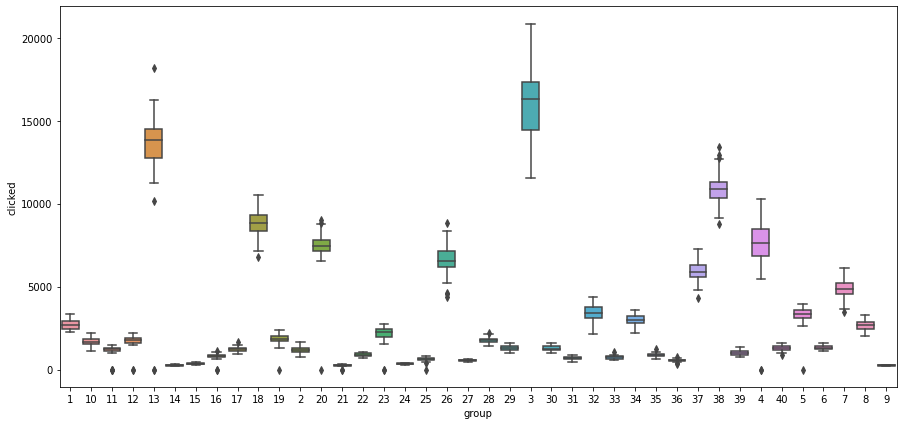

In [9]:
#Distribution of number of ads clicked across groups
plt.figure(figsize=(15,7))
ax = sns.boxplot("group","clicked",data=data)

There are also significant differences in number of clicks, but most groups have similar number of clicks, groups that stand out are gtoup 3 and 13.

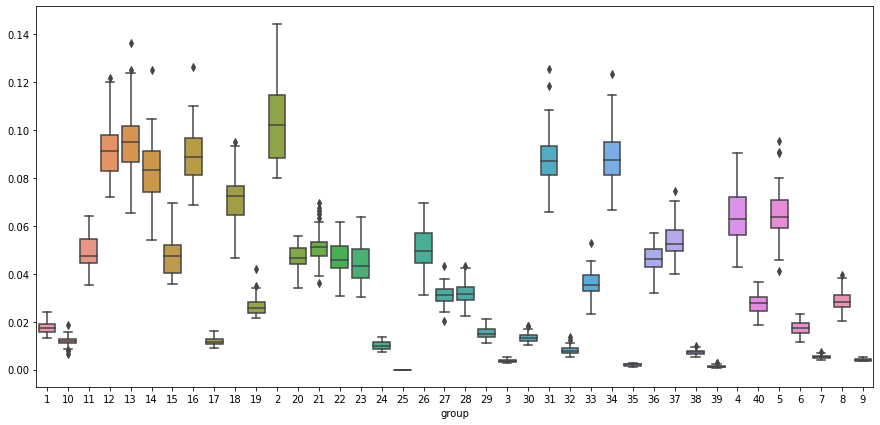

In [10]:
#Distribution of conversion rate across groups
plt.figure(figsize=(15,7))
ax = sns.boxplot(data["group"],data["converted"]/data["clicked"])

Conversion patterns are completely different than two plots before, with group 2 having highest median conversion rate. Therefore, conversion rate or the revenue associated can be used to gauge the performance of ads.

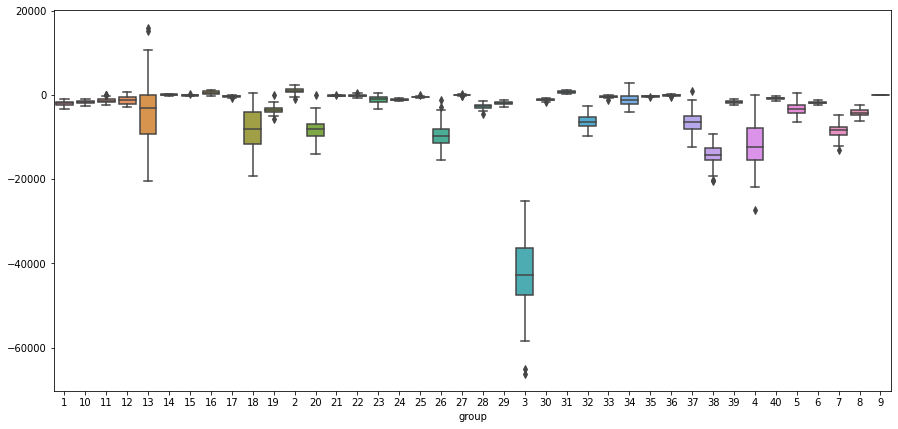

In [11]:
#Lastly we can calculate the total profit brought by each ads group
total_profit = data['total_revenue'] - data['avg_cost_per_click'] * data['clicked']
plt.figure(figsize=(15,7))
ax = sns.boxplot(data["group"],total_profit)

Group 3 has a very low average profit. Many other groups have negative profits as well. Some groups have fluctuating performance, reflected by the width of their IQR. It might be worth finding out average profit per ads shown, to assess the average performance.

In [12]:
data.loc[:,"total profit"] = total_profit

In [13]:
data[data["total profit"]>0].sort_values("total profit",ascending = False).head(5)

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,group,total profit
664,2015-10-30,157960,12359,1273,1.60,35841.62,ad_group_13,13,16067.22
678,2015-11-13,158855,13805,1349,1.77,39623.71,ad_group_13,13,15188.86
669,2015-11-04,157876,12151,1505,1.57,29793.91,ad_group_13,13,10716.84
652,2015-10-18,163903,12108,1314,1.51,27877.65,ad_group_13,13,9594.57
635,2015-10-01,162075,14470,1389,1.81,35232.44,ad_group_13,13,9041.74


In [14]:
avg_prof=data.groupby("group").apply(lambda x:sum(x["total profit"])/sum(x["shown"]))

In [15]:
avg_prof.sort_values(ascending=False).head(5)

group
16    0.020516
2     0.020116
14    0.016485
31    0.005824
27    0.000725
dtype: float64

Based on the above metric, top performing groups are 16, 2, 14, 31, and 27. Pros of the metric are great interpretability and simple calculation, since profit is often the first metric to consider in business and the formula is easy to understand. One con of this metric can be its lack of time dimension in calculation. In reality, we might also want to consider ads improvement over time and weight observations differently, but this metric takes the aggregation and ignores time.

#### Looking at Data Over Time

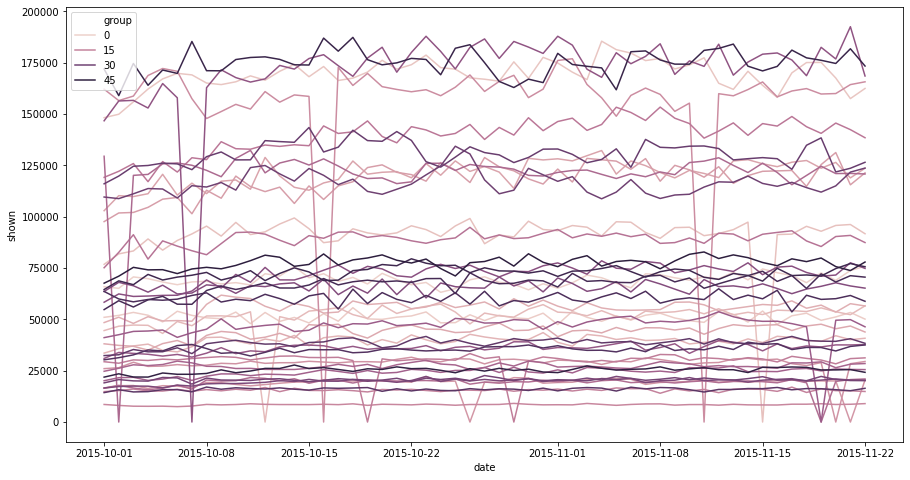

In [16]:
plt.figure(figsize=(15,8))
data.loc[:,"date"] = pd.to_datetime(data["date"])
sns.lineplot(data["date"],data["shown"],hue = data["group"].astype(int))
plt.legend()

Based on the line plot above, several ads groups have significant dips during certain periods, on those days no ads were being shown, therefore time series modeling with indicators might be needed.

In [17]:
data[data["shown"]==0]
#some are weekdays

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,group,total profit
204,2015-11-15,0,0,0,0.0,0.0,ad_group_4,4,0.0
223,2015-10-12,0,0,0,0.0,0.0,ad_group_5,5,0.0
554,2015-10-26,0,0,0,0.0,0.0,ad_group_11,11,0.0
580,2015-11-21,0,0,0,0.0,0.0,ad_group_11,11,0.0
632,2015-11-20,0,0,0,0.0,0.0,ad_group_12,12,0.0
650,2015-10-16,0,0,0,0.0,0.0,ad_group_13,13,0.0
676,2015-11-11,0,0,0,0.0,0.0,ad_group_13,13,0.0
811,2015-10-19,0,0,0,0.0,0.0,ad_group_16,16,0.0
821,2015-10-29,0,0,0,0.0,0.0,ad_group_16,16,0.0
1000,2015-11-19,0,0,0,0.0,0.0,ad_group_19,19,0.0


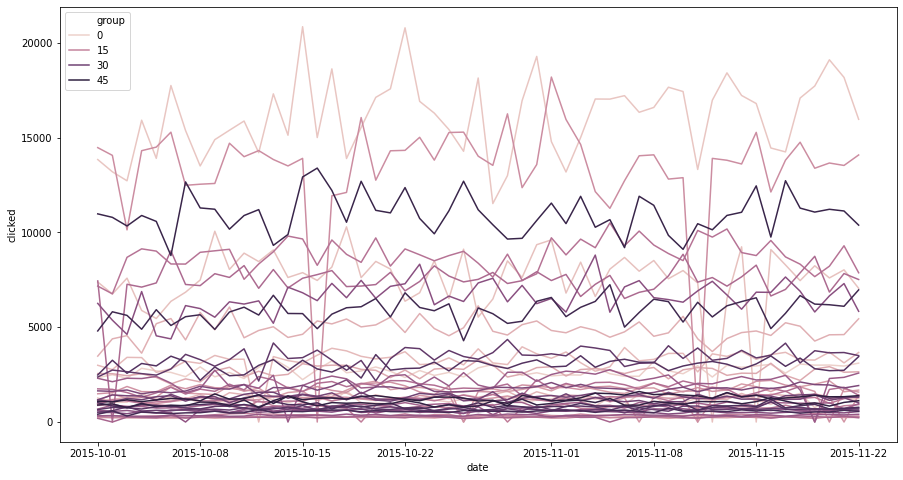

In [18]:
#distribution of clicks over time
plt.figure(figsize=(15,8))
data.loc[:,"date"] = pd.to_datetime(data["date"])
sns.lineplot(data["date"],data["clicked"],hue = data["group"].astype(int))
plt.legend()

<AxesSubplot:xlabel='date', ylabel='clicked'>

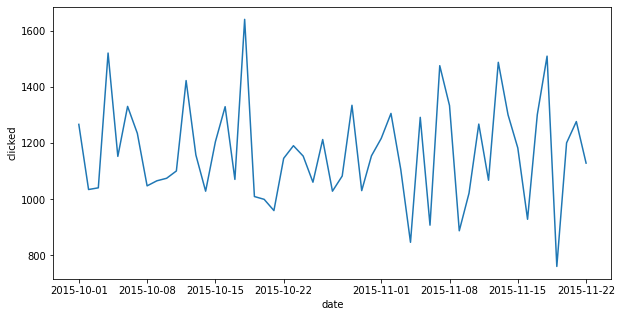

In [19]:
#for ad group 2 specifically
plt.figure(figsize=(10,5))
group2 = data[data["group"]=="2"]
sns.lineplot(group2["date"],group2["clicked"])

<AxesSubplot:xlabel='date', ylabel='shown'>

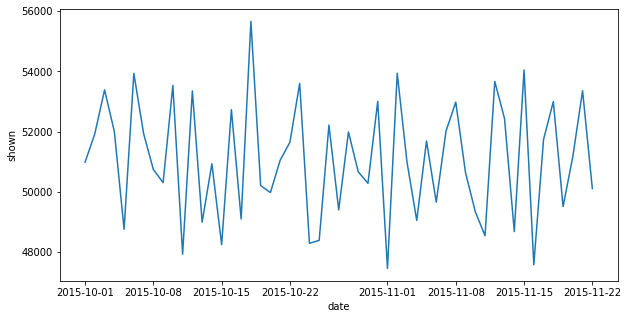

In [20]:
#for ad group 2 specifically
plt.figure(figsize=(10,5))
group2 = data[data["group"]=="2"]
sns.lineplot(group2["date"],group2["shown"])

### 3. Time Series Modeling
- Build a Prophet model for each ads group
- Build a SARIMA model for each ads group
- In this notebook, ads group 2 was used as an example.

In [21]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [22]:
df_ = data[data["group"]=="2"]
df_.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,group,total profit
53,2015-10-01,50988,1267,109,0.70,1704.28,ad_group_2,2,817.38
54,2015-10-02,51934,1035,140,0.58,918.21,ad_group_2,2,317.91
55,2015-10-03,53386,1041,123,0.56,1548.48,ad_group_2,2,965.52
56,2015-10-04,52008,1521,127,0.76,1911.39,ad_group_2,2,755.43
57,2015-10-05,48766,1153,108,0.65,1403.14,ad_group_2,2,653.69


In [23]:
df = df_[["date","shown"]].rename(columns={"date":"ds","shown":"y"})
df.tail()

,ds,y
101,2015-11-18,52999
102,2015-11-19,49519
103,2015-11-20,51178
104,2015-11-21,53358
105,2015-11-22,50115


In [24]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
#Dec.15th is 23 days away from the last date
future = m.make_future_dataframe(periods=23)
future.head()

,ds
0,2015-10-01
1,2015-10-02
2,2015-10-03
3,2015-10-04
4,2015-10-05


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
71,2015-12-11,51215.333077,48598.160477,53749.377464
72,2015-12-12,51122.351978,48738.320352,53575.382623
73,2015-12-13,50773.747113,48197.086112,53211.783862
74,2015-12-14,50635.054746,48162.863311,53121.342213
75,2015-12-15,50304.792074,47735.608466,52767.217677


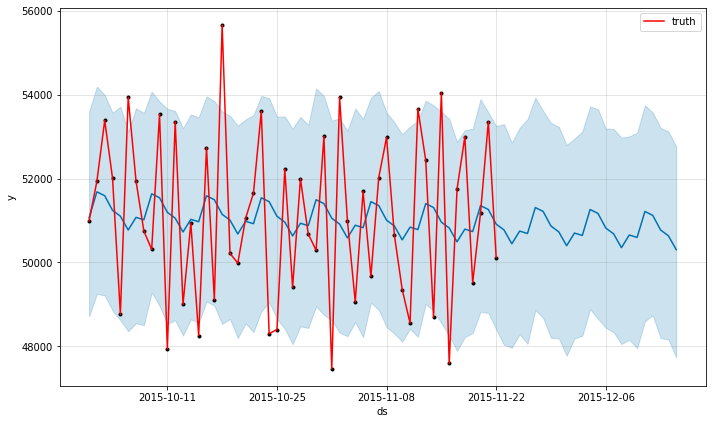

In [27]:
fig1 = m.plot(forecast)
plt.plot("date","shown",data=df_,color="r",label="truth")
plt.legend()

Prophet model captures the seasonality of the shown feature, but not quite the fluctuations (but most of them lie within boundries of the confidence interval.

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(df_["shown"])[1]
#p value almost zero, rejects the null that the series is not stationary
#so shown feature is stationary

9.783346803162073e-06

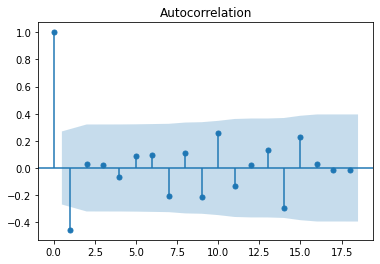

In [30]:
a = plot_acf(df_["shown"])

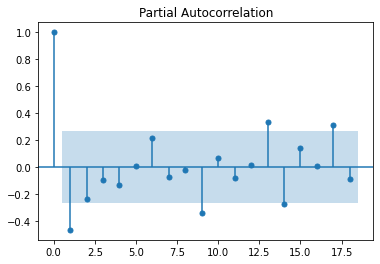

In [31]:
a = plot_pacf(df_["shown"])

There is a seasonal component shown by both plots' ups and downs.

In [32]:
from pmdarima import auto_arima

In [33]:
auto_arima(df_["shown"])

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [34]:
sarima_mod = SARIMAX(df_["shown"],order=(1,0,1),seasonal_order = (1,1,1,7))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [35]:
res = sarima_mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             shown   No. Observations:                   53
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood                -434.025
Date:                           Tue, 05 Jan 2021   AIC                            878.050
Time:                                   14:03:07   BIC                            887.193
Sample:                                        0   HQIC                           881.475
                                            - 53                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4701      0.607     -0.774      0.439      -1.660       0.720
ma.L1          0.3695      0.576      0.641      0.521      -0.760       1.499
ar.S.L7        0.0474      0.646      0.073      0.942      -1.218       1.313
ma.S.L7       -0.0751      0.644     -0.117      0.907      -1.338       1.188
sigma2      7.405e+06   1.46e-07   5.05e+13      0.000     7.4e+06     7.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.58   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.00   Prob(JB):                         0.76
Heteroskedasticity (H):               0.94   Skew:                             0.21
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+30. Standard errors may be unstable.
"""

In [36]:
preds = res.forecast(23)
preds.head()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


53    48235.258704
54    51422.832877
55    52999.051726
56    49572.434260
57    51234.113866
Name: predicted_mean, dtype: float64

<AxesSubplot:ylabel='predicted_mean'>

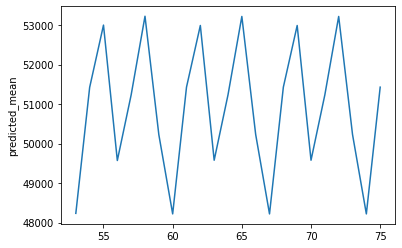

In [37]:
sns.lineplot(preds.index,preds)

In [38]:
df_["date"].iloc[-1]

Timestamp('2015-11-22 00:00:00')

In [39]:
new_dates = []
for i in range(1,24):
    new_dates.append(df_["date"].iloc[-1]+pd.Timedelta(days=i))

In [40]:
new_dates

[Timestamp('2015-11-23 00:00:00'),
 Timestamp('2015-11-24 00:00:00'),
 Timestamp('2015-11-25 00:00:00'),
 Timestamp('2015-11-26 00:00:00'),
 Timestamp('2015-11-27 00:00:00'),
 Timestamp('2015-11-28 00:00:00'),
 Timestamp('2015-11-29 00:00:00'),
 Timestamp('2015-11-30 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2015-12-02 00:00:00'),
 Timestamp('2015-12-03 00:00:00'),
 Timestamp('2015-12-04 00:00:00'),
 Timestamp('2015-12-05 00:00:00'),
 Timestamp('2015-12-06 00:00:00'),
 Timestamp('2015-12-07 00:00:00'),
 Timestamp('2015-12-08 00:00:00'),
 Timestamp('2015-12-09 00:00:00'),
 Timestamp('2015-12-10 00:00:00'),
 Timestamp('2015-12-11 00:00:00'),
 Timestamp('2015-12-12 00:00:00'),
 Timestamp('2015-12-13 00:00:00'),
 Timestamp('2015-12-14 00:00:00'),
 Timestamp('2015-12-15 00:00:00')]

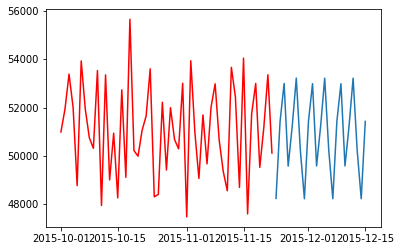

In [41]:
plt.plot("date","shown",data=df_,color="r",label="truth")
plt.plot(new_dates,preds)

In [42]:
preds.iloc[-1]

51428.49739391693

By setting a seasonal component, SARIMA captures the seasonality shown in the previous pattern, according to this model, the number of ads to be displayed on Dec. 15th is 51429.

### 4. Clustering

Cluster ads into 3 groups based on the trend of average cost per click. To have basic estimates of trend, we can build a linear model on each of the groups and cluster them based on the sign of the slope.

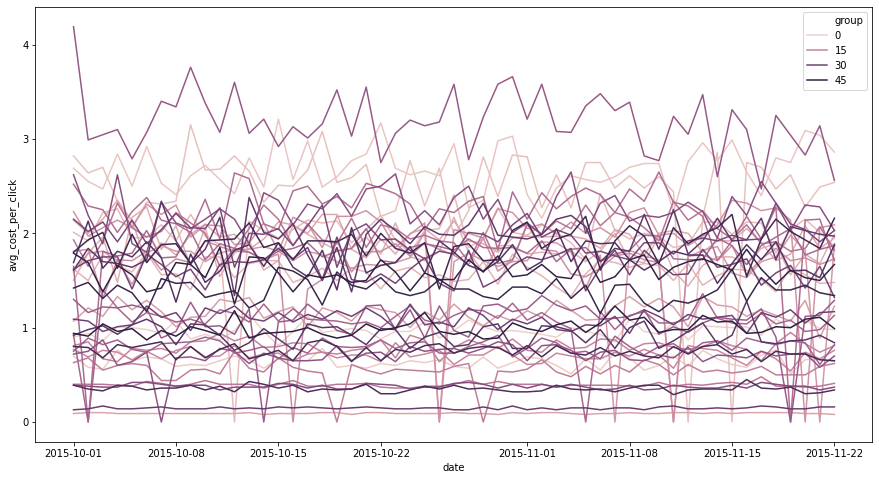

In [45]:
#visualize average cost for all ad groups
plt.figure(figsize=(15,8))
sns.lineplot(data["date"],data["avg_cost_per_click"],hue = data["group"].astype(int))
plt.legend()

The trends and patterns are quite messy, it will be necessary to work with individual groups.

<AxesSubplot:xlabel='date', ylabel='avg_cost_per_click'>

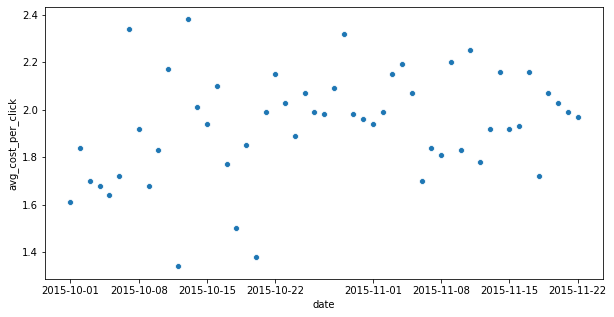

In [115]:
plt.figure(figsize=(10,5))
group2 = data[data["group"]=="32"]
sns.scatterplot(group2["date"],group2["avg_cost_per_click"])

In [72]:
t = pd.DataFrame({"t":np.arange(1,len(data["date"].value_counts().index)+1)})

In [73]:
from sklearn.linear_model import LinearRegression

In [111]:
coefs = np.array([])
num_groups = len(np.unique(data["group"]))
for i in range(1,num_groups+1):
    group_i = data[data["group"] == str(i)]
    t = pd.DataFrame({"t":np.arange(1,group_i.shape[0]+1)})
    mod = LinearRegression()
    mod.fit(t,group_i["avg_cost_per_click"])
    coefs = np.append(coefs, mod.coef_[0])

In [112]:
coefs = pd.Series(coefs)
coefs.index=np.arange(1,num_groups+1)
coefs = coefs.sort_values()
coefs

4    -0.007732
19   -0.007037
11   -0.006617
24   -0.006357
12   -0.003053
8    -0.002689
7    -0.002569
28   -0.001832
6    -0.001734
23   -0.001374
29   -0.001280
36   -0.001072
33   -0.000967
38   -0.000809
14   -0.000803
35   -0.000412
13   -0.000368
16   -0.000318
27   -0.000302
22   -0.000244
10   -0.000188
30   -0.000114
17   -0.000027
2    -0.000006
9     0.000044
31    0.000080
34    0.000128
15    0.000406
21    0.000460
18    0.000651
26    0.000724
1     0.000926
25    0.001060
39    0.001141
5     0.001453
40    0.001922
3     0.002445
37    0.002610
32    0.004258
20    0.004466
dtype: float64

We can cluster ads into trend down, flat and up groups based on the above ranking.